## Symbolic solution of ODEs with sympy
Intro to sympy variables in previous notebook.

In [1]:
import sympy as sym
sym.init_printing() # for LaTeX formatted output

import scipy as sp

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

In [2]:
x = sym.symbols('x') 
f, g = sym.symbols('f g', cls=sym.Function)

In [3]:
f(x)

#### Define the differential equation as a sym.Eq()

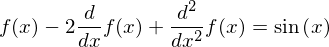

In [4]:
diffeq = sym.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sym.sin(x))
diffeq

#### Solve differential equation

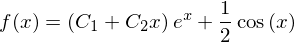

In [5]:
soln = sym.dsolve(diffeq,f(x))
soln

#### Boundary conditions
This isn't implemented yet in `dsolve` -- it's on the "to do" list<br>
For now, solve for contants on your own. For example, if
$$ f(0) = 1\quad\mbox{and}\quad\left.\frac{df}{dx}\right|_0 = 0,  $$
solve the following equations:

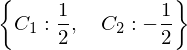

In [6]:
constants = sym.solve([soln.rhs.subs(x,0) - 1, soln.rhs.diff(x,1).subs(x,0)- 0])
constants

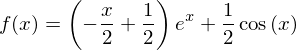

In [7]:
C1, C2 = sym.symbols('C1,C2')
soln = soln.subs(constants)
soln

#### Convert soln to python function for numerical evaluation/plotting
I'm not sure why I had to specify the modulue for conversion of sympy functions.<br>
See http://docs.sympy.org/latest/modules/utilities/lambdify.html<br>
In previous examples, sympy figured out a good module "on its own." 

In [8]:
func = sym.lambdify(x,soln.rhs,'numpy')

<IPython.core.display.Javascript object>


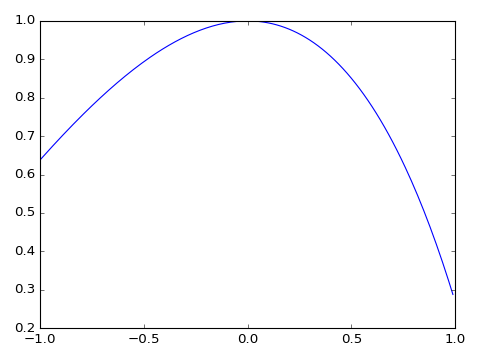

In [9]:
xx = sp.arange(-1,1,.01)  # name = xx so it won't collide with symbol x
y = func(xx)
plt.figure(1)
plt.plot(xx,y);

### Version Information

`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on linuxremotes), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [10]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [11]:
version_information sympy, scipy, matplotlib

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
sympy 1.1
scipy 0.19.1
matplotlib 2.0.2
Tue Aug 01 11:22:32 2017 EDT